In [196]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix 
from extra_keras_datasets import emnist
import tensorflow.keras as keras

In [197]:
(input_train,target_train),(input_test,target_test) = emnist.load_data(type='balanced')

INFO:root:Loading dataset = emnist


In [198]:
allowed_idx = list(range(0,9)) + list(range(10,16))

toLabel = {}
for i in range(0,10):
  toLabel[i] = str(i)

toLabel[10] = "A"
toLabel[11] = "B"
toLabel[12] = "C"
toLabel[13] = "D"
toLabel[14] = "E"
toLabel[15] = "F"

In [199]:
x_train = []
y_train = []
x_test = []
y_test = []

for idx in range(len(target_train)):
  if target_train[idx] in allowed_idx:
    x_train.append(input_train[idx])
    y_train.append(target_train[idx])


for idx in range(len(target_test)):
  if target_test[idx] in allowed_idx:
    x_test.append(input_test[idx])
    y_test.append(target_test[idx])

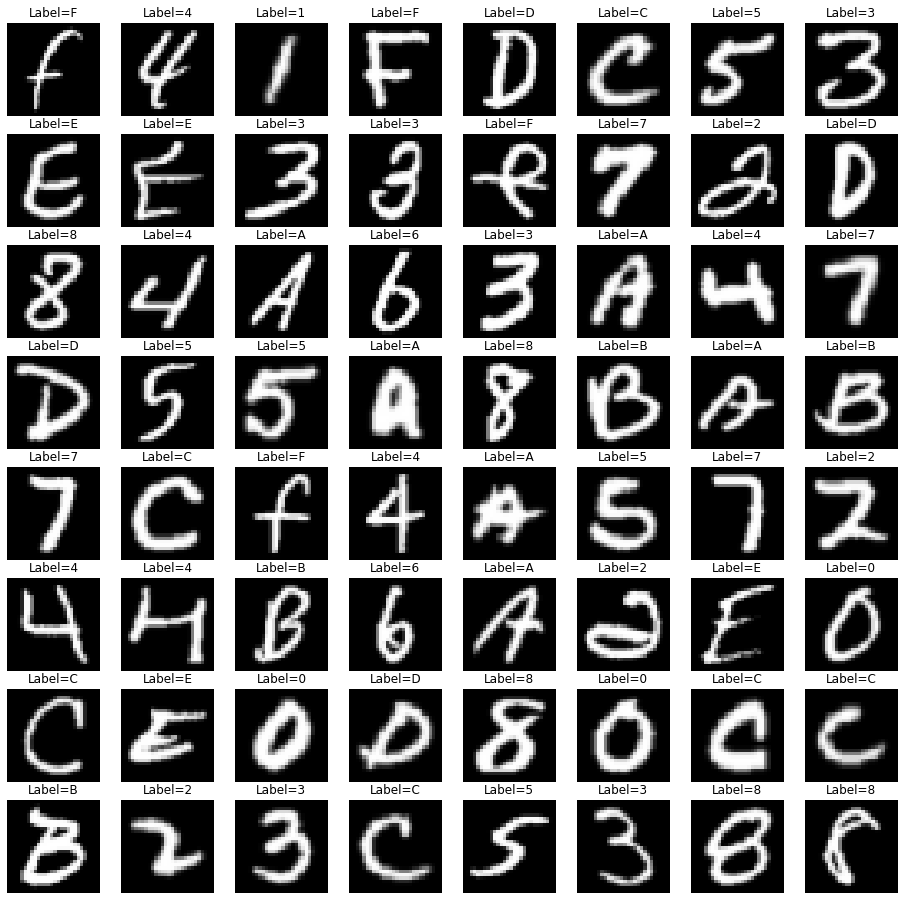

In [200]:
%matplotlib inline

NUM_PICS = 8

fig, ax = plt.subplots(nrows=NUM_PICS,ncols=NUM_PICS,figsize=(
    NUM_PICS*2,
    NUM_PICS*2
))

for i1,row in enumerate(ax):
  for i2,col in enumerate(row):
    idx = NUM_PICS * i1 + i2
    col.imshow(x_train[idx],cmap='gray')
    col.title.set_text("Label=" + toLabel[y_train[idx]])
    col.axis('off')

In [201]:
x_train = np.array(x_train) / 255
y_train = np.array(y_train)
x_val = np.array(x_train[30000:])
y_val = np.array(y_train[30000:])
x_train = x_train[:30000]
y_train = y_train[:30000]
x_test = np.array(x_test) / 255
y_test = np.array(y_test)

In [202]:
x_train = x_train.reshape(list(x_train.shape) + [1])
x_test = x_test.reshape(list(x_test.shape) + [1])
y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)
x_val = x_val.reshape(list(x_val.shape) + [1])
y_val = keras.utils.to_categorical(y_val)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(30000, 28, 28, 1)
(30000, 16)
(6000, 28, 28, 1)
(6000, 16)
(6000, 28, 28, 1)
(6000, 16)


In [203]:
model = tf.keras.models.load_model("MNist-ConvModel1.h5")
model.pop()

In [204]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [205]:
for m in model.layers:
  m.trainable=False

In [206]:
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(16,activation='softmax'))

In [207]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [209]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=12,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/12
235/235 [==============================] - 10s 41ms/step - loss: 0.1069 - accuracy: 0.9677 - val_loss: 0.0772 - val_accuracy: 0.9738
Epoch 2/12
235/235 [==============================] - 9s 40ms/step - loss: 0.0852 - accuracy: 0.9724 - val_loss: 0.0714 - val_accuracy: 0.9770
Epoch 3/12
235/235 [==============================] - 9s 38ms/step - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0655 - val_accuracy: 0.9805
Epoch 4/12
235/235 [==============================] - 9s 38ms/step - loss: 0.0629 - accuracy: 0.9795 - val_loss: 0.0604 - val_accuracy: 0.9807
Epoch 5/12
235/235 [==============================] - 9s 39ms/step - loss: 0.0546 - accuracy: 0.9812 - val_loss: 0.0620 - val_accuracy: 0.9802
Epoch 6/12
235/235 [==============================] - 9s 38ms/step - loss: 0.0481 - accuracy: 0.9837 - val_loss: 0.0634 - val_accuracy: 0.9807
Epoch 7/12
235/235 [==============================] - 9s 39ms/step - loss: 0.0451 - accuracy: 0.9849 - val_loss: 0.0643 - val_accuracy: 0.981

In [210]:
def printHistory(hr):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,(1))
  plt.plot(hr.history['accuracy'],linestyle='-.')
  plt.plot(hr.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='lower right')
  plt.subplot(1,2,(2))
  plt.plot(hr.history['loss'],linestyle='-.')
  plt.plot(hr.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper right')

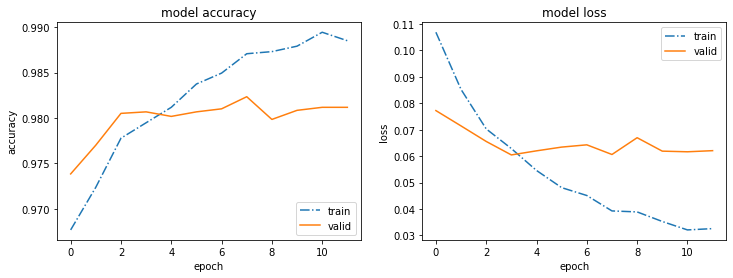

In [211]:
printHistory(history)

In [213]:
loss0, accuracy0 = model.evaluate(x = x_test,y = y_test)
print("loss=" + str(loss0))
print("accuracy=" + str(accuracy0))

188/188 [==============================] - 2s 11ms/step - loss: 0.0635 - accuracy: 0.9825
loss=0.06350372731685638
accuracy=0.9825000166893005


In [214]:
pred=model.predict(x_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[385   0   0   0   0   0   1   0   0   1   0   0  13   0   0]
 [  0 395   2   0   1   0   1   1   0   0   0   0   0   0   0]
 [  2   0 393   1   0   0   0   2   2   0   0   0   0   0   0]
 [  1   0   0 398   0   0   0   0   1   0   0   0   0   0   0]
 [  1   0   1   0 396   0   0   0   1   0   0   0   1   0   0]
 [  0   0   0   0   0 396   1   0   1   0   0   0   0   0   2]
 [  0   0   0   0   0   1 399   0   0   0   0   0   0   0   0]
 [  1   0   2   0   0   0   0 397   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 396   1   2   0   1   0   0]
 [  0   0   0   0   5   0   0   1   2 391   0   0   0   0   1]
 [  1   0   0   2   0   0   1   0   4   6 382   1   0   3   0]
 [  3   0   0   0   0   0   2   0   0   0   0 393   0   2   0]
 [ 16   0   0   1   1   0   0   0   0   1   1   0 380   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0 399   0]
 [  0   0   1   0   1   0   0   1   1   0   0   1   0   0 395]]
Acc_fc_orig_flat =  0.9825
